# Wrangle

We will start with mall_customers database.

- acquire verify our acquire module is working 
- summarize our data
- plot histograms and boxplots
- na's
- outliers
- astype()
- pd.cut()

# Practice with Mall Data

# Acquire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env 
import os

import acquire

In [2]:
df = acquire.get_mall_data()

# Summarize

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

# Takeaways

- encode gender
- drop customer_id
- define our target variable: spending_score

In [6]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [8]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Takeaways
- not sure how annual income is computed or what units it is in
- don't know what spending score means, assuming that the higher the score, more likely to spend...better to market to?

# Plot distributions

Histograms

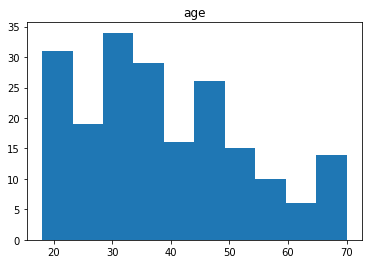

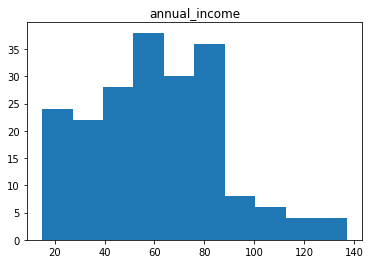

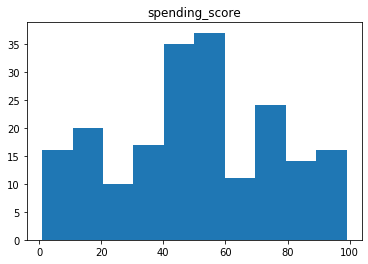

In [9]:
for col in ['age', 'annual_income', 'spending_score']:  
    plt.hist(df[col])
    plt.title(col)
    plt.show()

# Boxplots

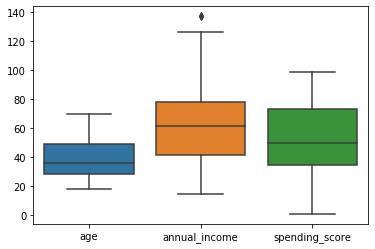

In [10]:
sns.boxplot(data=df[['age','annual_income','spending_score']])

nulls, outliers, cut, dropma, fillna, replace, get_dummies

train, validate, test split
update prepare.py file to make necessary changes

In [11]:
df.isna()

,customer_id,gender,age,annual_income,spending_score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


This gives a true or false for every item in the dataframe

In [12]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

**Takeaway:** There are no nulls in our data set  

**Cutting / Binning** lets us turn a continous variable into a categorical one.  

- pd.cut creates bins of equal width
- pd.qcut creates bins with the same number of observatons in each   

This is can be useful for initial exploration, interpretation, and visualization.

In [13]:
pd.cut?

In [14]:
pd.cut(df.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [15]:
pd.qcut(df.age, 4).value_counts().sort_index()

(17.999, 28.75]    50
(28.75, 36.0]      54
(36.0, 49.0]       51
(49.0, 70.0]       45
Name: age, dtype: int64

In [16]:
pd.cut(df.age, bins=[0,30,50,100]).value_counts().sort_index()

(0, 30]      62
(30, 50]     98
(50, 100]    40
Name: age, dtype: int64

In [17]:
df['is_female'] = (df.gender == 'Female').astype('int')
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [18]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)

print('train', train.shape)
print('test', test.shape)
print('validate', validate.shape)


train (144, 6)
test (30, 6)
validate (26, 6)


# Workflow

- notebook -> python script workflow
    - start out in a notebook
    - experiment and rapidly iterate
    - consolidate code and move into a .py script
    - import the .py script into our notebook 
- data flow: acquire - prepare - exploration
- what are the benefits of a py script over a notebook?
    - so we dont have to use jupyter notebook
    - easier to transfer info
    - keep notebook for insights 
    - we can import functions from py scripts
    - better project orgnanization 
- What ae some downsides of py files? 
    - harder to interpret comments
    - no kernels, the whole script has to be run at once
- markdown
    - "y" turns it into a code cell  
    - "m" turns it into a markdown cell

Grab all the code that modifies dataframe

In [19]:
# initial code
df = acquire.get_mall_data()

# modification to code
def prep_mall_data(df):
    '''
    Takes the acquired mall data, does data prep, and returns 
    train, test, and validate data splits.
    '''
    df['is_female'] = (df.gender == 'Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train, test, validate

# Telco Churn Exercise Problem

Throughout the exercises for Regression in Python lessons, you will use the following example scenario: As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

- The first step will be to acquire and prep the data. 

In [20]:
df = acquire.get_telco_data()

In [21]:
df.shape

(1695, 4)

In [22]:
df.head() 

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [23]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges       object
dtype: object

In [24]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

### 1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [25]:
def get_connection(db, username=env.username, host=env.host, password=env.password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def new_telco_data():
    '''
    This function reads the telco churn data from the Codeup db into a df, 
    write it to a csv file, and returns the df.
    '''
    sql_query = 'SELECT customer_id, monthly_charges, tenure, total_charges FROM customers WHERE contract_type_id = 3';
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    df.to_csv('telco_churn_df.csv')
    return df

def get_telco_data(cached=False):
    '''
    This function reads in telco churn data from Codeup database if cached == False
    or if cached == True reads in telco churn df from a csv file, returns df
    '''
    if cached or os.path.isfile('telco_churn_df.csv') == False:
        df = new_telco_data()
    else:
        df = pd.read_csv('telco_churn_df.csv', index_col=0)
    return df

In [26]:
df = new_telco_data()

In [27]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


### 2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [28]:
df.shape

(1695, 4)

In [29]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges       object
dtype: object

In [30]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [31]:
# remove white space
df['total_charges'] = df.total_charges.where((df.tenure != 0),0)

# convert data type to float
df['total_charges'] = df.total_charges.astype(float)

In [32]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [33]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [34]:
# Histograms

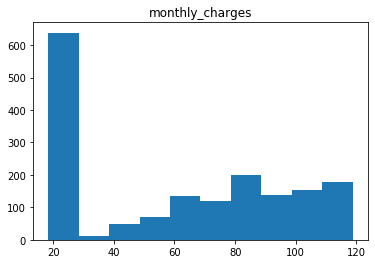

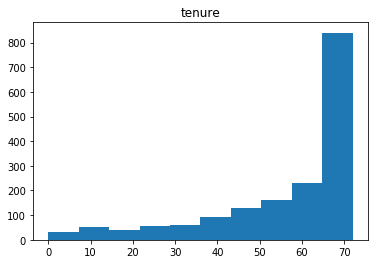

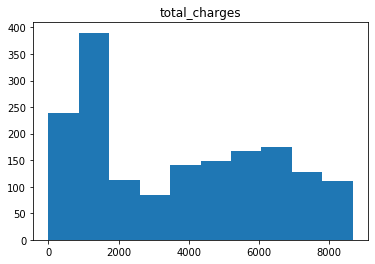

In [35]:
for col in ['monthly_charges', 'tenure', 'total_charges']:  
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [36]:
# Boxplots

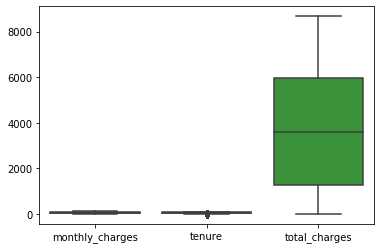

In [37]:
sns.boxplot(data=df[['monthly_charges', 'tenure', 'total_charges']])

<b> Takeaways: </b>
- no missing values 
- converted total_charges into a float value 

In [38]:
# split the data into train, validate and test
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

### 3. End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [39]:
def wrangle_telco():
    df = get_telco_data()
    df['total_charges'] = df.total_charges.where((df.tenure != 0),0)
    df['total_charges'] = df.total_charges.astype(float)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    return train, validate, test

In [40]:
train, validate, test

(     customer_id  monthly_charges  tenure  total_charges
 1256  7501-IWUNG            73.80      61        4616.05
 225   1303-SRDOK            69.05      55        3842.60
 662   3967-VQOGC            24.90      67        1680.25
 628   3777-XROBG            19.55      58        1079.65
 824   5075-JSDKI            24.45      59        1493.10
 ...          ...              ...     ...            ...
 441   2664-XJZNO           104.90      72        7559.55
 98    0567-XRHCU            43.95      69        2960.10
 886   5334-AFQJB            25.10      72        1789.90
 322   2001-MCUUW           108.65      46        4903.20
 1593  9418-RUKPH            19.95      38         756.40
 
 [949 rows x 4 columns],
      customer_id  monthly_charges  tenure  total_charges
 132   0780-XNZFN            20.65      57        1125.60
 1616  9548-LIGTA            81.05      61        4747.65
 1203  7139-JZFVG            60.50      60        3694.45
 367   2229-DPMBI            19.50       8   

In [41]:
train.shape

(949, 4)

<b> Takeaways: </b>
- filtered data 